Assignent 1 


### Large‐Scale Computing for Data Analytics


Silvia Bardoni



In [2]:
#Imports and settings
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys
from tqdm.notebook import tqdm
from sklearn.datasets import load_diabetes

np.set_printoptions(suppress=True)

#### *Task 1*

In [3]:
# Load the diabetes dataset
x, y = load_diabetes(return_X_y=True)
#help(load_diabetes) # description of dataset

In [4]:
print(x.shape)

(442, 10)


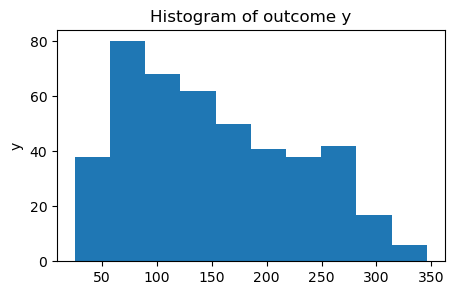

In [5]:
plt.figure(figsize=(5,3))

plt.hist(y)
plt.ylabel('y') 
plt.title("Histogram of outcome y") 
plt.show()

**Comment:** the histogram is right_skewed 

#### *Task 2*

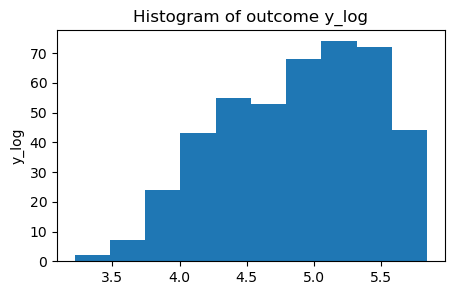

In [6]:
#log the 
plt.figure(figsize=(5,3))

y_log = np.log(y)
plt.ylabel('y_log') 
plt.title("Histogram of outcome y_log") 
plt.hist(y_log)
plt.show()

In [7]:
# Split the data into training/testing sets, rounding the split down to the nearest integer
split = 0.8
N = len(y)
sample = int(split*N)

x_train, x_test, y_train, y_test = x[:sample,:], x[sample:, :], y_log[:sample, ], y_log[sample:,]

#### *Task 3*

In [8]:
bmi_train = x_train[:, 2]  
bmi_test = x_test[:, 2]  

In [9]:
#bmi_test.shape

In [10]:
#Create variables to train
b0 = tf.Variable(2.0, dtype=tf.float64)   # initialised as per task4
b1 = tf.Variable(0.0, dtype=tf.float64)   # initialised as per task4

2023-06-11 15:19:52.163723: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 15:19:52.718012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10794 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7


Define statistical model

In [11]:
# define model
def LinearModel(x):
   return tf.add(tf.multiply(x, b1), b0)

In [12]:
# define mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

#### *Task4*

In [13]:
# compile
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) 
epochs = range(5000)

In [14]:
for i in epochs:
    with tf.GradientTape() as tape:
        predicted = LinearModel(bmi_train) 
        current_loss = loss(y_train, predicted)
    gradients = tape.gradient(current_loss, [b1, b0])
    optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
    if i%100 == 0: #every 100 steps
        print('epoch:' + str(i) + 'b0:' + str(b0) + 'b1:' + str(b1) + '  Loss = ' + str(current_loss))

epoch:0b0:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.057613008877964>b1:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.0002402607483616333>  Loss = tf.Tensor(8.600350131627982, shape=(), dtype=float64)
epoch:100b0:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.506269356256135>b1:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.02619927726789916>  Loss = tf.Tensor(0.44744418975242994, shape=(), dtype=float64)
epoch:200b0:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.831023088231512>b1:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.0533185724868797>  Loss = tf.Tensor(0.30331861304491464, shape=(), dtype=float64)
epoch:300b0:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.8741059324555875>b1:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.0804907356618281>  Loss = tf.Tensor(0.30005708309353896, shape=(), dtype=float64)
epoch:400b0:<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.8798336739606

In [15]:
# loss it still decreasing after 500 epochs

In [16]:
slope_mse = b1
intercept_mse = b0
print(b0, b1, current_loss)

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=4.88138548295267> <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.2358569440649216> tf.Tensor(0.27150686970169385, shape=(), dtype=float64)


Repeating in Tensorbard to confirm. Parameters re-initialised

In [17]:
# Set up logging jupiterhub tensorboard
logdir = '/home/jovyan/logs/Silvia'
writer = tf.summary.create_file_writer(logdir)

with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss = loss(y_train, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
        if i%20 == 0: #every 20 steps
            tf.summary.scalar('loss_mse', current_loss, step=i)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [18]:
# Final loss for the test: slightly bigger that training
predicted_test = LinearModel(bmi_test)
loss(y_test, predicted_test)

<tf.Tensor: shape=(), dtype=float64, numpy=0.28371905591485>

#### *Task5* - mae

In [19]:
# Reinitialize variables to train
b0 = tf.Variable(2.0, dtype=tf.float64)   # initialised as per task4
b1 = tf.Variable(0.0, dtype=tf.float64)   # initialised as per task4

#model
def LinearModel(x):
    return tf.add(tf.multiply(x, b1), b0)
    
# define mean absolute error
def loss_mae(y_true, y_pred):
    return (tf.reduce_mean(tf.abs(tf.Variable(y_true) - y_pred)))

In [20]:
with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss = loss_mae(y_train, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
        # write the value to tensorboard summary stats and print
        if i%100 == 0: #every 20 time steps
            tf.print("epoch:", i, "current_loss:", current_loss, "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
            tf.summary.scalar('loss_mae', current_loss, step=i)  #this is a single number

  0%|          | 0/5000 [00:00<?, ?it/s]

epoch: 0 current_loss: 2.8806505082857483 b0: 2.0099999997764826 b1: -6.0011002141582988e-06
epoch: 100 current_loss: 1.8806501705054446 b0: 3.0099999774247408 b1: -0.00060611112162998885
epoch: 200 current_loss: 0.92693119545307157 b0: 3.9850707771599581 b1: -0.00048366057592306755
epoch: 300 current_loss: 0.52316210487223846 b0: 4.5965721799224273 b1: 0.010383419723680848
epoch: 400 current_loss: 0.47101906522263076 b0: 4.8161189172248031 b1: 0.029725295289828351
epoch: 500 current_loss: 0.46224572921147505 b0: 4.9013880371319152 b1: 0.049896216982300269
epoch: 600 current_loss: 0.46073436428806441 b0: 4.9320962517429754 b1: 0.070945074636411962
epoch: 700 current_loss: 0.460238029114428 b0: 4.9368554584354589 b1: 0.09238958559511036
epoch: 800 current_loss: 0.45977028944844311 b0: 4.9396883195619372 b1: 0.11383054064305838
epoch: 900 current_loss: 0.45931722579859963 b0: 4.9391217473366416 b1: 0.13502878799609053
epoch: 1000 current_loss: 0.45886843386726545 b0: 4.9376486595508728 b

In [21]:
slope_mae = b1
intercept_mae = b0

#### *Task6* - plotting

In [22]:
# Calculating the predictions of final model
predictions_mae_train = slope_mae * bmi_train + intercept_mae 
predictions_mse_train = slope_mse * bmi_train + intercept_mse
predictions_mae_test = slope_mae * bmi_test + intercept_mae 
predictions_mse_test = slope_mse * bmi_test + intercept_mse

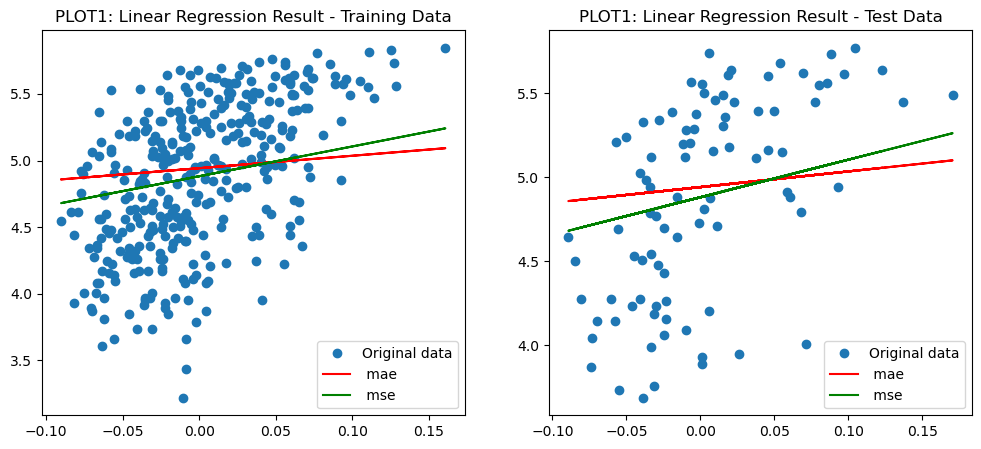

In [23]:
#define grid of plots
fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(12, 5))

# Plotting the Results for training data
ax[0].plot(bmi_train, y_train, 'o', label ='Original data') # y_train is alredy logged
ax[0].plot(bmi_train, predictions_mae_train, label =' mae', color ='red') 
ax[0].plot(bmi_train, predictions_mse_train, label =' mse', color = 'green') 
ax[0].set(title='PLOT1: Linear Regression Result - Training Data', xlabel='', 
       ylabel='');
ax[0].legend() 

# Plotting the Results for test data
ax[1].plot(bmi_test, y_test, 'o', label ='Original data') 
ax[1].plot(bmi_test, predictions_mae_test, label =' mae', color ='red') 
ax[1].plot(bmi_test, predictions_mse_test, label =' mse', color = 'green') 
ax[1].set(title='PLOT1: Linear Regression Result - Test Data', xlabel='', 
       ylabel='');
ax[1].legend() 

plt.show()

For both training and test data mse model is better with higher slope and lower intecept  ADD!

#### *Task7*

  0%|          | 0/10000 [00:00<?, ?it/s]

epoch: 0 current_loss_train: 2.8806505082857483 current_loss_test: 8.0981726790710162 b0: 2.1000000014901161 b1: -6.0011004377167084e-05
epoch: 100 current_loss_train: 0.45887760074112066 current_loss_test: 0.34505805186083754 b0: 4.9373938114759595 b1: 0.15762197044980517
epoch: 200 current_loss_train: 0.45471804767086682 current_loss_test: 0.33821087573745795 b0: 4.9362606669831557 b1: 0.36121335600991061
epoch: 300 current_loss_train: 0.45083712813042753 current_loss_test: 0.33236638354241327 b0: 4.9402266727079738 b1: 0.55802471041194379
epoch: 400 current_loss_train: 0.44723978777507473 current_loss_test: 0.32714185099210641 b0: 4.9453258229255947 b1: 0.74738205328689622
epoch: 500 current_loss_train: 0.4437432864899008 current_loss_test: 0.32121958922297528 b0: 4.9424929616935831 b1: 0.93435575876404209
epoch: 600 current_loss_train: 0.44028754215280941 current_loss_test: 0.31622768974293952 b0: 4.9453258229255947 b1: 1.1201444332453578
epoch: 700 current_loss_train: 0.4369415962

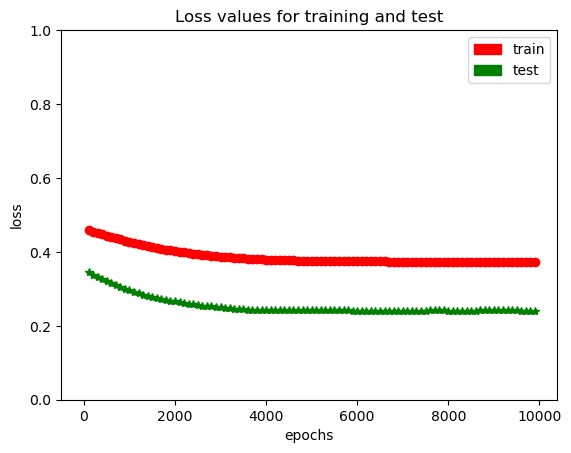

In [39]:

b0 = tf.Variable(2.0, dtype=tf.float64)   # re-initialised
b1 = tf.Variable(0.0, dtype=tf.float64)   # re-initialised 

# compile
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
epochs = range(10000)

#model
def LinearModel(x):
    return tf.add(tf.multiply(x, b1), b0)
    
# define mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

with writer.as_default():
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss = loss(y_train, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
        # write the value to tensorboard summary stats and print
        if i%100 == 0: #every 20 time steps
            tf.print("epoch:", i, "current_loss_train:", current_loss, "current_loss_test:", loss(y_test, LinearModel(bmi_test)), "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
            plt.ylim(0, 1)
            plt.plot(i, current_loss, 'o', label ='train', color = 'red') 
            plt.plot(i, loss(y_test, LinearModel(bmi_test)), '*', label ='test', color ='green')
            plt.xlabel('epochs')
            plt.ylabel('loss')
            plt.title('Loss values for training and test')

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='train')
blue_patch = mpatches.Patch(color='green', label='test')

plt.legend(handles=[red_patch, blue_patch])
        

In [ ]:
b0 = tf.Variable(2.0, dtype=tf.float64)   # re-initialised
b1 = tf.Variable(0.0, dtype=tf.float64)   # re-initialised 

# compile
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
epochs = range(10000)


with writer.as_default():
    loss_train_SGD = []
    loss_test_SGD = []
    for i in tqdm(epochs):
        with tf.GradientTape() as tape:
            predicted = LinearModel(bmi_train) 
            current_loss_train = loss(y_train, predicted)
            current_loss_test = loss(y_test, LinearModel(bmi_test))
        gradients = tape.gradient(current_loss_train, [b1, b0])
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))
        loss_train_SGD.append(current_loss_train)
        loss_test_SGD.append(current_loss_test)
        # write the value to tensorboard summary stats and print
#         if i%100 == 0: #every 20 time steps
#             tf.print("epoch:", i, "current_loss_train:", current_loss, "current_loss_test:", loss(y_test, LinearModel(bmi_test)), "b0:",  b0, "b1:", b1, output_stream=sys.stdout)
#             plt.ylim(0, 1)
#             plt.plot(i, current_loss, 'o', label ='train', color = 'red') 
#             plt.plot(i, loss(y_test, LinearModel(bmi_test)), '*', label ='test', color ='green')
#             plt.xlabel('epochs')
#             plt.ylabel('loss')
#             plt.title('Loss values for training and test')

# import matplotlib.patches as mpatches

# red_patch = mpatches.Patch(color='red', label='train')
# blue_patch = mpatches.Patch(color='green', label='test')

# plt.legend(handles=[red_patch, blue_patch

In [ ]:
plt.ylim(0, 1)
plt.plot(loss_train_SGD,'-', color = 'red', label='train')
plt.plot(loss_test_SGD,'-', color ='green', label='test')
plt.legend()

#### *Task8*